Imposing train column structure on test...
SMOTE oversampling...
No automatic feature selection...
(84222, 299) (12971, 299) (71588, 299) (7783, 299)
Validation Summary:
Calculate Optimal Threshold


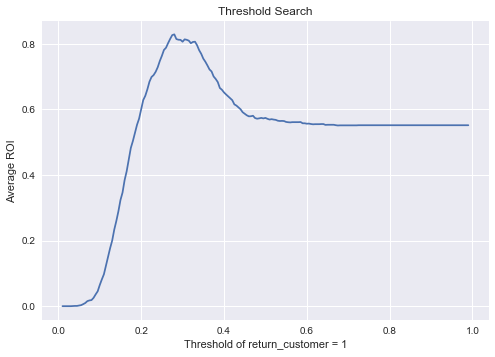

Threshold: 0.28
Average ROI: 0.828215341128
ROC Score: 0.651920552199
Validation Return Customers: 2198 of 7783 (28.24%)
[[4792 1525]
 [ 793  673]]
Testing Return Customers: 3627 of 12971 (27.96%)


In [1]:
from badsproject import BADS

#####################################
#
#  Variable Selection
#
#####################################
params_rf = {
    ######### Set Seed #########
    "rs": 90049,
    "save_model": False,

    ######### Feature Selection #########
    "manual_features_to_remove": ["x_order_date_num", "x_account_creation_date_num", 
                                  "x_deliverydate_estimated_num", "x_deliverydate_actual_num"],
    "feature_correlation_removal": False,
    "feature_correlation_threshold": 0.7,
    "automatic_feature_selection": False,
    "automatic_feature_threshold": 0.005,

    ######### Oversampling #########
    # non-standard package: http://contrib.scikit-learn.org/imbalanced-learn/index.html
    "oversample_method": "SMOTE",

    ######### Cross-Valdiation #########
    "do_cv": False, # this takes a long time
    "cv_num_folds": 4,
    "cv_validation_frac": 0.15,
    "cv_rs_iters": 10,

    ######### Model Selection #########
    "model_to_use": "rf", # "rf" or "gbc" or "linear"
    "clf_default_params": {'min_samples_split': 2, 'n_estimators': 250, 
                           'min_samples_leaf': 9, 'criterion': 'gini', 
                           'verbose': 0, 'oob_score': True, 'n_jobs': 3}
}

a = BADS()
a.set_model("rf")
a.__dict__.update(params_rf)
# Load and split training  and testing data and create cross validation sets from training data
a.create_datasets(use_woe = False)
# Oversample if desired
a.oversample()
# Run algorithm-based feature selection
a.automagic_feature_selection()
# Print size of training sets
print(a.X_train.shape, a.X_test.shape, a.X_train_cv.shape, a.X_valid_cv.shape)
# Run the models
a.run_model("output/8_rf_SMOTE.csv")

